## 1. Continuous-type Random Variable

We spoke about RVs that can take values from universal set $\Omega$ which is either finit or countably infinite; these were discrete-type random variables. But what if $\Omega$ is uncountably infinite,i.e. what if random variable $X$ can take any real number as a value? Then we have *(absolutely) continuous* random variable.

As with discrete-type RVs, continuous-type RVs have their distribution. With discrete RVs we use probability mass function (p.m.f) to describe their distribution. With continuous RVs, we have *probability density function (p.d.f)* which 'describes' them. One p.d.f. $\varphi(x)$ of a coninuous random variable may look like this:


**UBACI SLIKU**

Each p.d.f of a continuous RV should be defined, continuous and non-negative on the whole real-number line, and:

$$\int_{-\infty}^{+\infty}\varphi(x)dx = 1.$$

Don't worry about the integral - we are not going to compute integrals in this course. But we do need them to calculate probabilities for continuous RVs. The integral above tells us that the area under the curve of p.d.f. is always equal to 1. This seems familiar? This is actually completely analogous to the fact that, for discrete RV, all probabilities in its p.m.f. need always to sum to 1. 


So, what's the probability of RV, having p.d.f as in the figure above, to take value -5.5? It's

$$P(X = -5.5) = 0.$$

OK, that kinda makes sense. But, what about the probability of taking value 0?

$$P(X = 0) = 0.$$

Wait, what? And taking value $\sqrt{2}$?

$$P(X = \sqrt{2}) = 0.$$

Is it always going to be zero? Yes. Because the probability of hitting a point exactly you want, out of uncountably infinitely many others is - of course, zero. But how we can calculate probabilities at all, if the probability of every point is zero? We just need to broaden our views - not to ask about the probability of hitting a single point $x$ among ridiculously infinitely many, but to ask about the probability of hitting any point in the small interval $\Delta x$ which contains $x$... and uncountably infinite many other points. When working with continuous RVs we can hope to get positive probability only if we work with intervals, no matter how big or small. 

However, to get positive probabilities, those intervals need to be either fully or partially on the *support* of p.d.f. Support is the part of p.d.f. curve where this function is positive, i.e. $\varphi(x) > 0$. For really small intervals $\Delta x$ that are outside of the support, i.e. for which $\varphi(x) = 0$, there is 0 probability for RV $X$ to take any value from that interval. On the other hand, if we observe a really small interval $\Delta x$ around the point where p.d.f. takes its maximal value - there is the highest probability of RV $X$ taking values from this interval. 

In other words: higher the value of $\varphi(x)$ for some $x$ - higher the probability of RV $X$ getting some value from a very small interval $\Delta x$ around $x$. (but not in $x$ itself; there, the probability is zero)

***

So, we can calculate probability of continuous RV in any interval. How do we calculate probability of RV $X$ taking values in some interval $[a, b]$ where $a$ and $b$ are two numbers? Simply, using the formula:

$$P(a \leqslant X \leqslant b) = \int_a^b\varphi(x)dx.$$

It's that integral again... And again it makes sense again. Remember that, using Kolmogorov Axioms, we defined probability as a measure? We also mentioned that integral is the measure of the area under the curve. So, using an integral to measure area under the curve of p.d.f on some interval $[a,b]$, we are actually measuring the probability of RV $X$ to take any value from that interval.

Observing probabilites as integrals, i.e. areas of surfaces under the p.d.f curve is completely in-sync with Kolmogorov Axioms for probability-as-a-measure:

- Both probability and area are measures, and cannot be negative;
- Area of an empty set, or a point/line is zero. So is the probability;
- Bigger the area, bigger the probability; and we may encompass big areas by taking long intervals or intervals around high values of p.d.f;
- We can just sum areas of disjoint figures to get the total area; the same is for probabilities of disjoint events.

One more important point. We saw that for discrete RVs every point matters (even if it's infinite). For some discrete RV $X$ we have

$$P(X \leqslant k) \neq P(X < k).$$

However, this is not the case with continuous RVs; there one point doesn't make a difference (why?). So, for some continuous RV $X$ we have

$$P(a \leqslant X \leqslant b) = P(a \leqslant X < b) = P(a < X < b).$$

***

As discrete RVs have c.d.f, so continuous RVs have one as well. Cumulative distribution function for a continuous random variable is given with 

$$F(a) = P(X\leqslant a) = \int_{-\infty}^a\varphi(x)dx.$$

C.d.f of a continuous RV $X$ gives the probability of $X$ taking any value from the interval $(-\infty, a]$. Or, area under the p.d.f curve on that interval. Here's how one c.d.f. of a continuous RV looks like:

**UBACI SLIKU**

C.d.f. is a prety handy tool for computing probabilities of continuous RVs, even more useful than p.d.f! In fact, by knowing the c.d.f we can compute probabilites while avoiding integrals, using this formula:

$$P(a \leqslant X \leqslant b) = F(b) - F(a).$$

And we can also calculate 

$$P(X \geqslant a) = 1 - P(X < a) = 1 - F(a).$$

***

For continuous RVs very useful is *quantile function*, which is the inverse of a c.d.f:

$$Q(p) = F^{-1}(p),\qquad p\in(0, 1).$$

Simply put, for $p = 0.1$ we can get a value $x$ for which we can expect to find 10% of points in the interval $(-\infty, x]$ when sampling from a RV $X$ having c.d.f $F$. 

The most important values for $p$ for the quantile functions are 0.25, 0.5 and 0.75, which give values for quartiles Q1, Q2 (median) and Q3. 

## 2. Continuous-type Random Variable Distributions

Enough of theoretical talk, and let's do some coding now. 

In [1]:
import numpy as np
import pandas as pd
import scipy
import math
import matplotlib.pyplot as plt
import seaborn as sns

rng = np.random.default_rng(seed=1023)

### Continuous Uniform Distribution

Continuous Uniform Distribution $\mathcal{U}[a, b]$ describes an experiment where there is an arbitrary outcome that lies in the interval $[a, b]$. In other words, we can equally expect any number in the interval $[a, b]$; no part of this interval is favoured than the other. 

We can sample from from Uniform Distribution on [0, 1] interval using `rng.random()`:

In [2]:
rng.random()

0.3388690800085262

In [3]:
rng.random(size=10)

array([0.90589874, 0.90960195, 0.74722338, 0.82310232, 0.26763656,
       0.08770086, 0.26731961, 0.70165033, 0.77665833, 0.37364504])

In [4]:
def sample_from_uniform_scatter(sample_size=10**2, perc=None):
    
    sample = rng.random(size=sample_size)

    fig, ax = plt.subplots(figsize=(8, 6))

    sns.scatterplot(x=sample, y=0, color='c')

    ax.axhline(0, c='k', linestyle='--', alpha=.2)
    
    if perc:
        ax.axvline(perc, c='m', linestyle='--')

    ax.set_xticks(np.arange(-.1, 1.2, .1));
    
    return sample

array([0.16165231, 0.30668439, 0.29964548, ..., 0.52466025, 0.00373206,
       0.29818011])

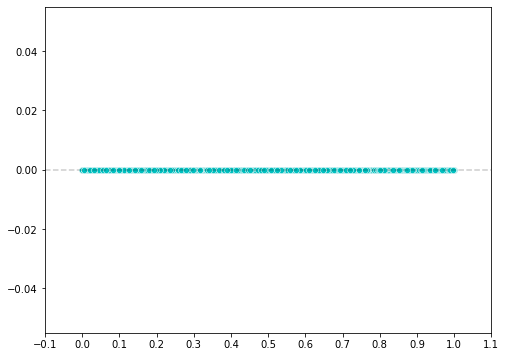

In [5]:
sample_from_uniform_scatter(sample_size=10**4)

By sampling big enough sample from $\mathcal{U}[0, 1]$ we might get a sense of how its p.d.f looks like.

In [6]:
def sample_from_uniform_hist(sample_size=10**6):
    
    fig, ax = plt.subplots(3, 1, figsize=(24, 18))
    
    outcomes = rng.random(size=sample_size)
    
    sns.histplot(ax=ax[0], x=outcomes, bins=10, stat='density')
    sns.histplot(ax=ax[1], x=outcomes, bins=10, stat='probability')
    sns.histplot(ax=ax[2], x=outcomes, bins=10, stat='probability', cumulative=True)
    
    ax[0].set_xticks(np.arange(0, 1.1, .1))
    ax[1].set_xticks(np.arange(0, 1.1, .1))
    ax[2].set_xticks(np.arange(0, 1.1, .1))
    
    ax[1].set_yticks(np.arange(0, 1.2, .2))
    
    ax[2].set_ylabel('Cumulative Probability')

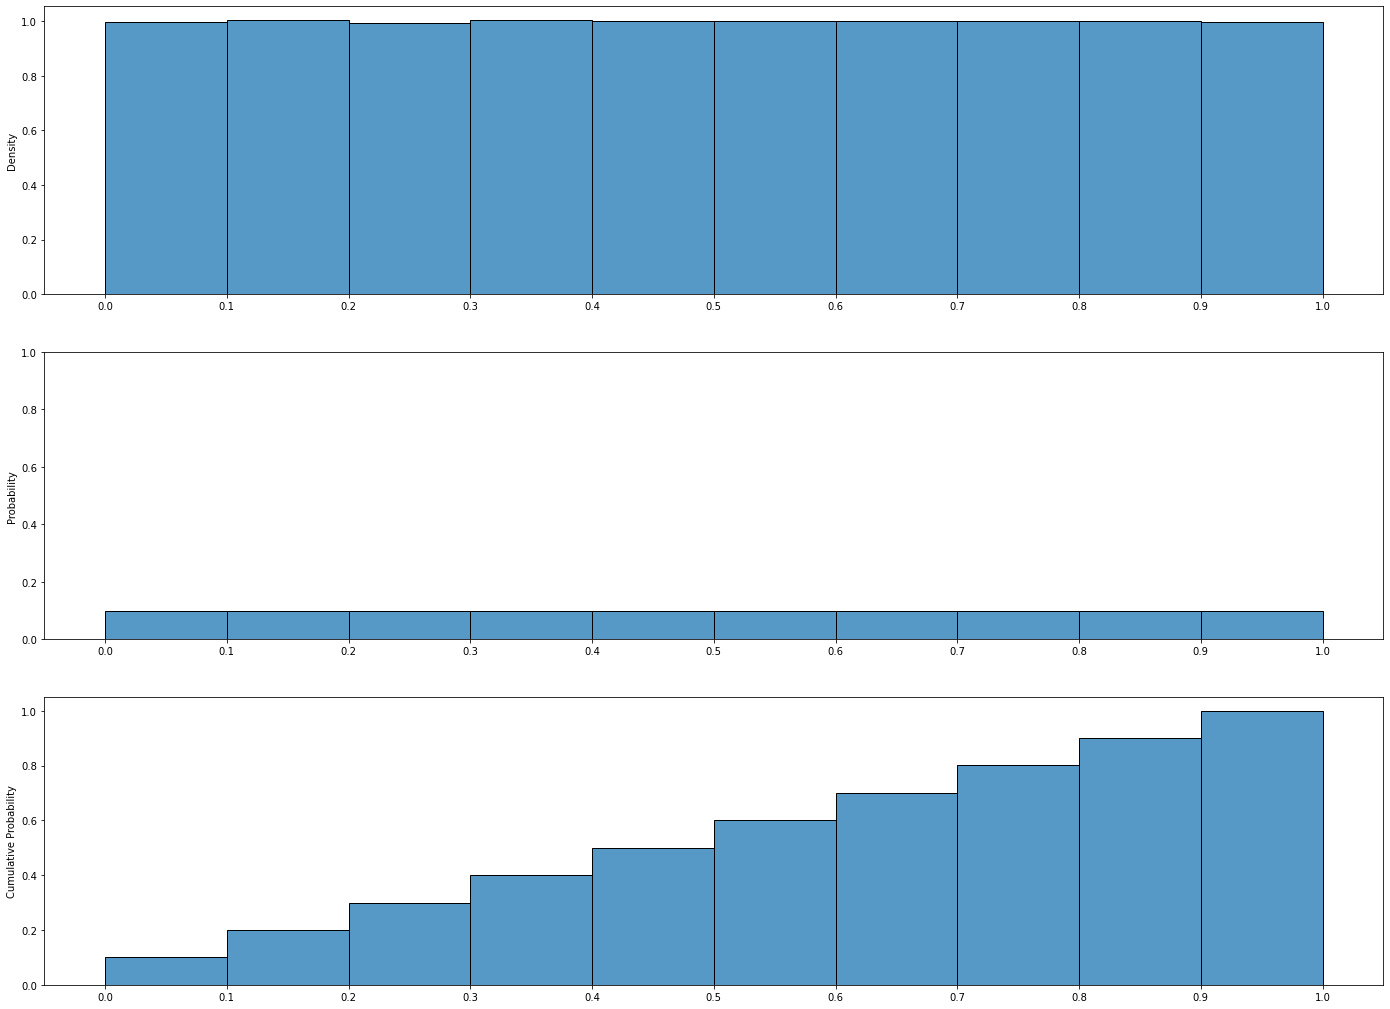

In [7]:
sample_from_uniform_hist(sample_size=10**6)

For RV $X\sim\mathcal{U}[a, b]$ we have its p.d.f, c.d.f and quantile function:

$$\varphi(x) = 
\begin{cases}
\frac{1}{b-a},\quad x\in[a, b],\\
0,\quad {\rm otherwise}.
\end{cases}
$$

$$\$$

$$F(x) = 
\begin{cases}
0,\quad x < a,\\
\frac{x-a}{b-a},\quad a\leqslant x\leqslant b,\\
1,\quad x > b.
\end{cases}
$$

$$\$$

$$Q(p) = a + p(b-a).$$

*We are sampling numbers from interval $[1, 4]$ uniformly at random. What is the probability of getting a number in the subinterval $[2, 3]$?*

So, we have $X\sim\mathcal{U}[1,4]$, and we calculate

$$P(2 < X < 3) = F(3) - F(2) = \frac{3-1}{4-1} - \frac{2-1}{4-1} = \frac{2}{3} - \frac{1}{3} = \frac{1}{3},$$

Which makes sense - subinterval [2, 3] is one third of the [1, 4] interval.

*What's the probability of getting a number greater than 3.99?*

$$P(X > 3.99) = 1 - F(3.99) = 1 - \frac{2.99}{3} \approx 1 - 0.9967 = 0.0033.$$

*If we sample numbers from interval $[0, 1]$ uniformly at random, find the point $x$ in that interval below which we expect to have 75% of our sample.*

Here we use quantile function

$$x = Q(0.75) = 0 + 0.75\cdot 1 = 0.75,$$

which is also an expected answer, given that we're sampling from the uniform distribution.

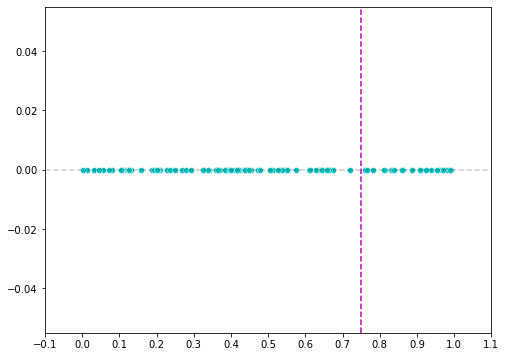

In [8]:
sample = sample_from_uniform_scatter(sample_size=10**2, perc=.75)

In [9]:
#ratio of points below 0.75

len(sample[sample < .75])/len(sample)

0.76

#### SciPy-stuff

For Continuous Uniform Distribution we use `uniform` object from `scipy.stats` module:

In [10]:
from scipy.stats import uniform

By default, `uniform` samples from $\mathcal{U}[0,1]$. If we want to sample from some other interval, we need to pass `loc` and `scale` in as arguments in its methods. Then we sample from $\mathcal{U}[{\rm loc,\ loc\ +\ scale}]$.

For example, if we want to sample from $\mathcal{U}[-1.1,\ \pi]$ we do:

In [11]:
uniform.rvs(loc=-1.1, scale=1.1 + math.pi, size=100)

array([ 0.19186552, -0.46685169,  2.20024603,  2.57482426, -0.62438617,
        1.62350436, -0.91481759,  0.66637962,  2.76702304, -0.98448177,
        1.00600182,  1.61884276,  1.33869489,  2.14427009, -0.7303674 ,
        0.75727587,  1.04118562,  0.64884492, -1.01887676,  1.8809462 ,
        1.45156478, -0.66235174,  1.91255349,  2.13590996,  2.62347598,
       -0.3830177 , -0.72666457,  1.1921288 , -0.03433224,  0.07405255,
        1.36065433,  0.1548189 ,  1.27310535, -0.53627917,  1.70684509,
        3.0466969 , -0.60379607,  1.22273972,  1.02609667,  2.35735492,
        2.56475772, -1.06038907,  0.15857013,  1.91765622,  2.55227084,
        0.91029556,  0.63528973, -0.23815453, -0.2748147 ,  1.50231675,
        1.93591095, -0.87601994,  2.54125659,  2.052421  ,  1.8989276 ,
       -0.84080485,  2.02804905,  0.28381586,  2.21316087,  1.64756009,
        1.5872623 ,  0.71740326,  2.53975417,  1.38869814,  2.2186971 ,
       -0.41378878, -0.14406873,  1.98687928,  1.57990712,  2.15

If we want to compute a value of p.d.f for RV $X\sim\mathcal{U}[-1.1,\ \pi]$ at some point $x$, we use `.pdf()` method:

In [12]:
uniform.pdf(x=3, loc=-1.1, scale=1.1 + math.pi)

0.2357604988667803

In [13]:
uniform.pdf(x=math.sqrt(2), loc=-1.1, scale=1.1 + math.pi)

0.2357604988667803

In [14]:
uniform.pdf(x=3.2, loc=-1.1, scale=1.1 + math.pi)

0.0

We can answer questions posed above for RV $X\sim\mathcal{U}[1, 4]$, without needing to do any calculations using `.cdf()` method:

In [15]:
uniform.cdf(x=3, loc=1, scale=3) - uniform.cdf(x=2, loc=1, scale=3)

0.3333333333333333

In [16]:
1 - uniform.cdf(x=3.99, loc=1, scale=3)

0.0033333333333332993

We can also look for values of quantile function using `.ppf()` method (because quantile function is also called *percent point function*):

In [17]:
uniform.ppf(q=.75)

0.75

### Exponential Distribution

Exponential distribution is the distribution of time between events in a process in which same events occur continuously and independently at a constant average rate. It's denoted by $\mathcal{E}(\beta)$, where $\beta$ is its parameter, called *scale parameter*, and it denotes an average time by which event should occur.

We can sample from Exponential Distribution using `rng.exponential()`:

In [18]:
rng.exponential(scale=3)

5.665433724043872

Let's sample bigger sample from $\mathcal{E}(3)$, to see how the points are going to be distributed.

In [19]:
def sample_from_exponential_scatter(beta, sample_size=10**2, perc=None):
    
    sample = rng.exponential(scale=beta, size=sample_size)

    fig, ax = plt.subplots(figsize=(8, 6))

    sns.scatterplot(x=sample, y=0, color='c')

    ax.axhline(0, c='k', linestyle='--', alpha=.2)
    
    if perc:
        
        med = -beta*np.log(1-perc)
        ax.axvline(med, c='m', linestyle='--')


    ax.set_xticks(np.arange(0, sample.max() + 1, 1));
    
    return sample

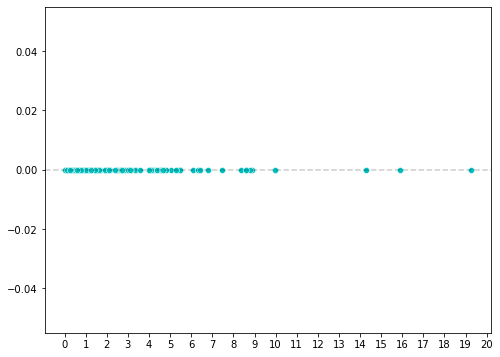

In [20]:
sample_from_exponential_scatter(3, sample_size=10**2);

But to get the true feel of how p.d.f. and c.d.f look like for Exponential Distribution, we'll use the following example:

Exponential Function can be used to model particle decay, which is a stochastic process. A particle decays at random time, which follows $\mathcal{E}(\beta)$ distribution, where $\beta$ is an average *lifetime of a particle*. Let's observe a particle that has an average lifetime of some unit inerval $\beta = 1$. We sample $N$ particles from a population of these particles and plot their lifetimes using histogram.

In [21]:
def sample_from_exponential_hist(beta, sample_size=10**3):
    
    fig, ax = plt.subplots(3, 1, figsize=(24, 18))
    
    sample = rng.exponential(scale=beta, size=sample_size)
    
    sns.histplot(ax=ax[0], x=sample, bins=100, stat='density')
    sns.histplot(ax=ax[1], x=sample, bins=100, stat='probability')
    sns.histplot(ax=ax[2], x=sample, bins=100, stat='probability', cumulative=True)
    
    ax[0].set_xticks(np.arange(0, sample.max() + 1, 1))
    ax[1].set_xticks(np.arange(0, sample.max() + 1, 1))
    ax[2].set_xticks(np.arange(0, sample.max() + 1, 1))
    
    ax[1].set_yticks(np.arange(0, 1.2, .2))
    
    ax[2].set_ylabel('Cumulative Probability')

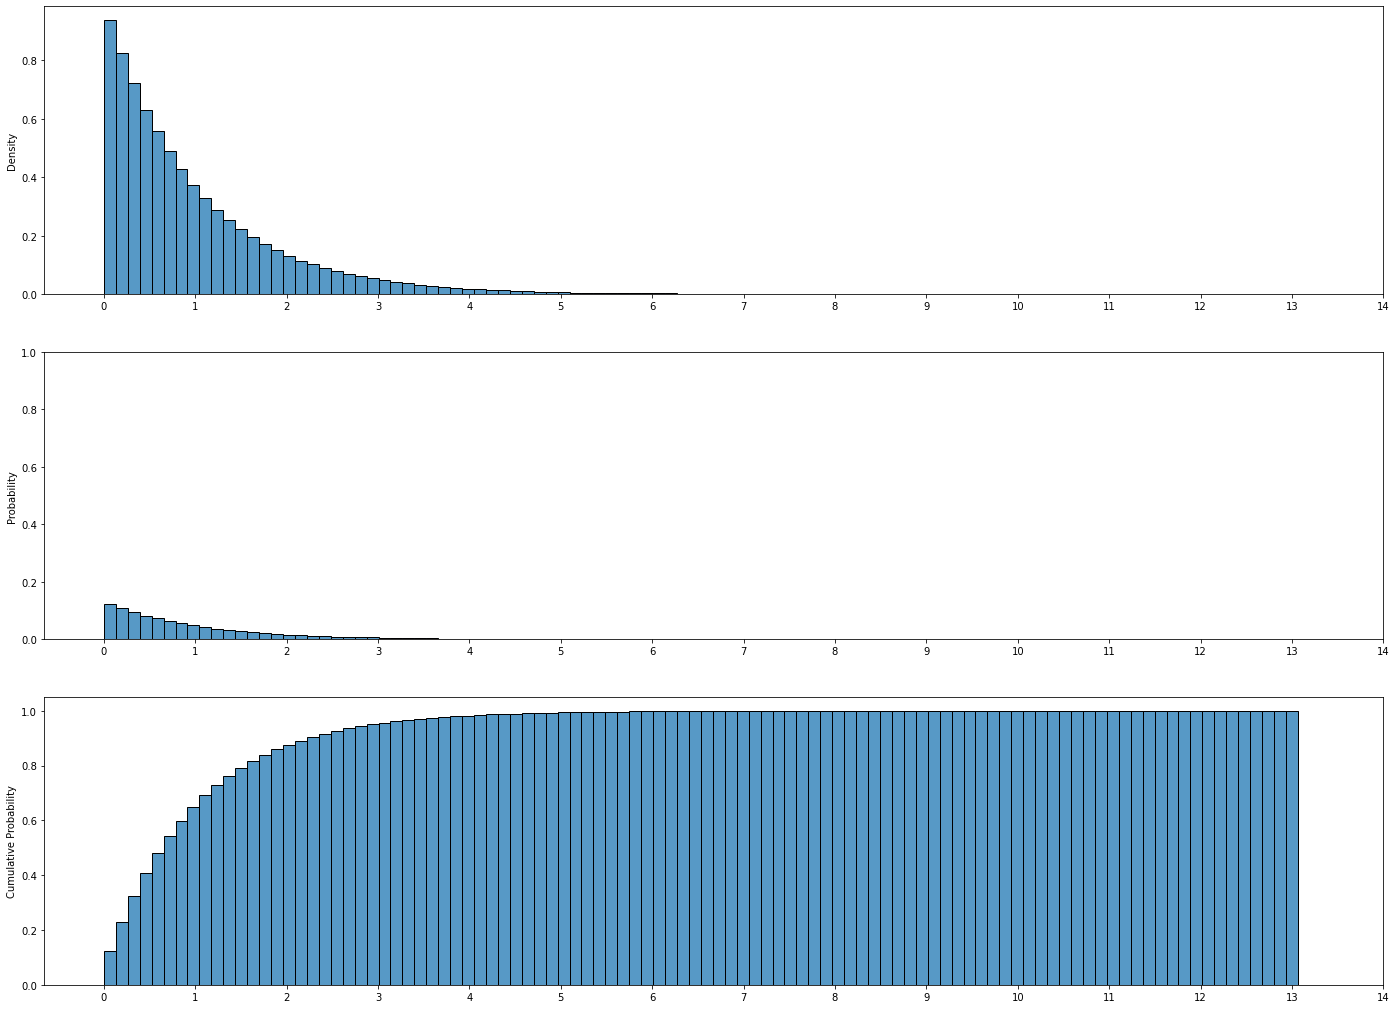

In [22]:
sample_from_exponential_hist(beta=1, sample_size=10**6)

Distribution seems familiar? This is because we may consinder Exponential Distribution as a coninuous generalization of Geometrical Distribution.

For RV $X\sim\mathcal{E}(\beta)$ we have its p.d.f, c.d.f and quantile function:

$$\varphi(x;\beta) = 
\begin{cases}
\frac{1}{\beta}e^{-x/\beta},\quad x\geqslant 0,\\
0,\quad x < 0.
\end{cases}
$$

$$\$$

$$F(x;\beta) = 
\begin{cases}
1 - e^{-x/\beta},\quad x\geqslant 0,\\
0,\quad x < 0.
\end{cases}
$$

$$\$$

$$Q(p;\beta) = -\beta\ln(1 - p).$$

#### SciPy-stuff

For Exponential Distribution we use `expon` object from `scipy.stats` module, along with corresponding methods.

In [23]:
from scipy.stats import expon

Sampling from $\mathcal{E}(1/3)$:

In [24]:
expon.rvs(scale=1/3, size=100)

array([7.95995686e-01, 1.55960211e-01, 4.10266197e-02, 3.79121426e-02,
       6.14918035e-01, 5.63374403e-01, 1.52108405e-01, 1.06639144e-01,
       4.26702573e-01, 9.08670678e-02, 5.55846030e-01, 4.36739946e-04,
       9.16376199e-01, 4.97516893e-01, 4.27092973e-01, 6.80104941e-04,
       1.63849475e-01, 9.77122649e-02, 1.35749251e-01, 5.66378171e-01,
       4.43887166e-01, 5.75295835e-02, 1.18767922e+00, 3.83845483e-01,
       3.12403737e-02, 5.80941563e-01, 4.21368555e-01, 8.71702304e-01,
       3.51403020e-01, 1.51201107e-01, 4.18468781e-01, 1.47257926e-01,
       1.64537142e+00, 4.85525534e-02, 1.82978645e-01, 8.51655476e-01,
       3.56463405e-01, 4.66551294e-01, 6.01782938e-01, 8.48077029e-02,
       8.43596935e-02, 4.93189125e-01, 5.32047624e-01, 4.23229243e-01,
       6.48386123e-01, 1.74149179e-01, 2.92811017e-01, 1.47496042e-01,
       4.35930167e-01, 1.05972921e-01, 5.28326104e-01, 2.98569809e-01,
       2.42580525e-01, 3.50084598e-02, 2.17165953e-01, 4.25877868e-01,
      

*It's a busy day and we are receiving, on average, 35 messages per hour. What's the probability of not getting any message in 15 minutes interval?*

We need to calculate 

$$P(X > 0.25) = 1 - P(X\leqslant 0.25) = 1 - F(0.25),$$

where $X\sim\mathcal{E}\big(\frac{1}{35}\big)$.

In [25]:
1 - expon.cdf(x=.25, scale=1/35)

0.00015846132511576627

*Let's get back to our particle decay. What's the half-life of a particle with an average lifetime of $\beta = 1$?*

For a population of particles, *half-life* is time interval within which a half of the particles in the population is expected to decay. In case you are telling to yourself that you didn't come to this course to do nuclear physics, all is fine - here you just need to do something you might be doing quite often in your job: compute the median. In this case a median for a population with $\mathcal{E}(1)$ distribution. And you don't need to really calculate it - SciPy can do it for you, using quantile function:

In [26]:
expon.ppf(q=.5, scale=1)

0.6931471805599453

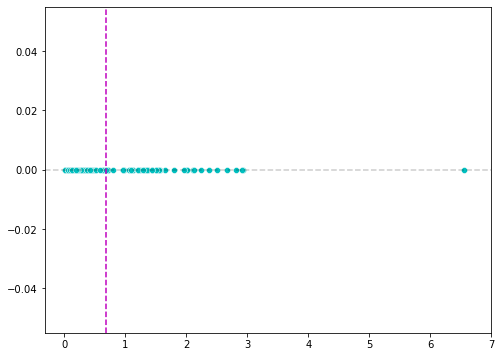

In [27]:
sample = sample_from_exponential_scatter(beta=1, sample_size=10**2, perc=.5)

In [28]:
len(sample[sample < 0.6931])/len(sample)

0.55

*Note*: Quite often Exponential Distribution is given by its *rate parameter* $\lambda$ which is the inverse of scale parameter $\beta$, i.e. $\lambda = \frac{1}{\beta}$.

### Normal (Gaussian) Distribution

Ah, the queen of distributions: well-known Normal Distribution with its so-called 'bell curve', loved and used both natural and social scientists alike. One of its main usages is using it as a distribution for random variables that have unknown distributions. This is the consequence of *Central Limit Theorem* which, loosely speaking, says that if we take a sample large enough, from a population with unknown distribution, we can approximate that distribution by Normal Distribution using the sample's mean and variance... under certain conditions of course. 

Normal Distribution, denoted by $\mathcal{N}(\mu, \sigma^2)$, has two parameters:

- $\mu$: *mean*, which dictates the peak of the bell-curve, i.e. a point which neighbourhood should be most densly populated by samples;

- $\sigma$: *standard deviation*, which dictates the thickness of the bell-curve, i.e. the dispersion of the sample away from the mean.

$\sigma^2$ which appears in the notation above is called *variance*.

We're going to plot p.d.f. and c.d.f of Normal Distribution by sampling. To sample from a population with Normal Distribution we use `rng.normal()` with arguments `loc` for $\mu$ and `scale` for $\sigma$.

*Average height of some population is 176cm with standard deviation of 6cm. Assuming that the height in this population is normally distributed, plot the heights from a random sample drawn from this population.*

We sample from $\mathcal{N}(176, 36)$.

In [29]:
def sample_from_normal_scatter(mu, sigma, sample_size=10**2):
    
    sample = rng.normal(loc=mu, scale=sigma, size=sample_size)

    fig, ax = plt.subplots(figsize=(16, 8))

    sns.scatterplot(x=sample, y=0, color='c')

    ax.axhline(0, c='k', linestyle='--', alpha=.2)
    
    ax.set_xticks(np.arange(round(sample.min()), sample.max() + 2, 2));

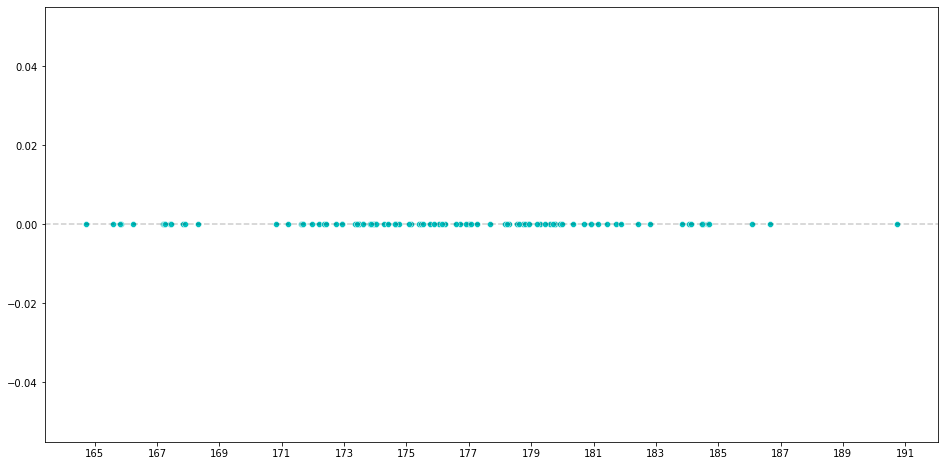

In [30]:
sample_from_normal_scatter(mu=176, sigma=6, sample_size=10**2)

In [31]:
def sample_from_normal_hist(mu, sigma, sample_size=10**3):
    
    fig, ax = plt.subplots(3, 1, figsize=(24, 18))
    
    sample = rng.normal(loc=mu, scale=sigma, size=sample_size)
    
    sns.histplot(ax=ax[0], x=sample, bins=100, stat='density')
    sns.histplot(ax=ax[1], x=sample, bins=100, stat='probability')
    sns.histplot(ax=ax[2], x=sample, bins=100, stat='probability', cumulative=True)
    
    ax[0].axvline(mu, c='r')
    
    ax[0].axvline(mu - sigma, c='g', linestyle='--')
    ax[0].axvline(mu + sigma, c='g', linestyle='--')
    
    ax[0].axvline(mu - 2*sigma, c='g', linestyle='--', alpha=.5)
    ax[0].axvline(mu + 2*sigma, c='g', linestyle='--', alpha=.5)
    
    ax[0].axvline(mu - 3*sigma, c='g', linestyle='--', alpha=.25)
    ax[0].axvline(mu + 3*sigma, c='g', linestyle='--', alpha=.25)

    
    ax[0].set_xticks(np.arange(round(sample.min()) - 1, sample.max() + sigma, sigma))
    ax[1].set_xticks(np.arange(round(sample.min()) - 1, sample.max() + sigma, sigma))
    ax[2].set_xticks(np.arange(round(sample.min()) - 1, sample.max() + sigma, sigma))
    
    ax[1].set_yticks(np.arange(0, 1.2, .2))
    
    ax[2].set_ylabel('Cumulative Probability')

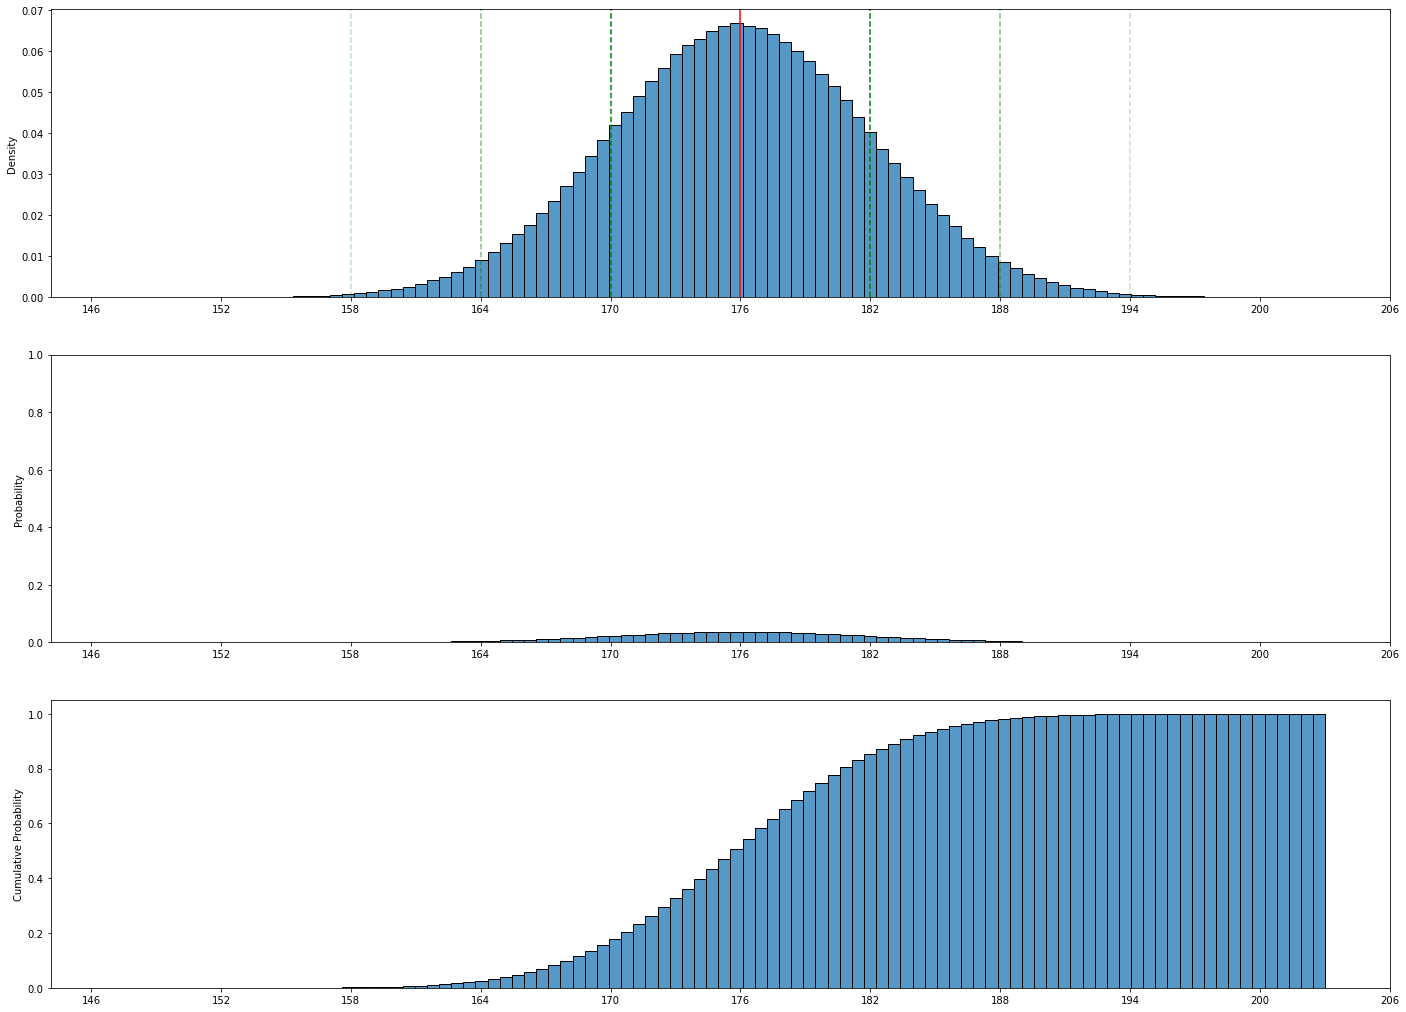

In [32]:
sample_from_normal_hist(mu=176, sigma=6, sample_size=10**6)

The p.d.f for RV with Normal Distribution $X\sim\mathcal{N}(\mu, \sigma^2)$ is given by

$$\varphi(x) = \frac{1}{\sigma\sqrt{2\pi}}e^{-\frac{1}{2}\big(\frac{x-\mu}{\sigma}\big)^2}.$$

A very special Normal Distribution is the one with $\mathcal{N}(0, 1)$, and it's called *Standard Normal Distribution*. Its p.d.f. and c.d.f. are

$$\varphi(z) = \frac{1}{\sqrt{2\pi}}e^{-\frac{z^2}{2}}$$

$$\$$

$$\Phi(z) = \frac{1}{\sqrt{2\pi}}\int_{-\infty}^ze^{-\frac{x^2}{2}}dx.$$

It's integrals again... shouldn't c.d.f relieve us of calculating integrals? Well, yes, but there's no simpler way to represent c.d.f for Standard Normal Distribution. Luckily, every statistics and probability textbook has a table of values of $\Phi(z)$ for various values of $z$. 

Looking at one of those tables we obtain, for $Z\sim\mathcal{N}(0, 1)$, 

$$\Phi(-2.27) = P(Z < -2.27) = 0.0116.$$

We can plot p.d.f and c.d.f. by sampling from such $Z$:

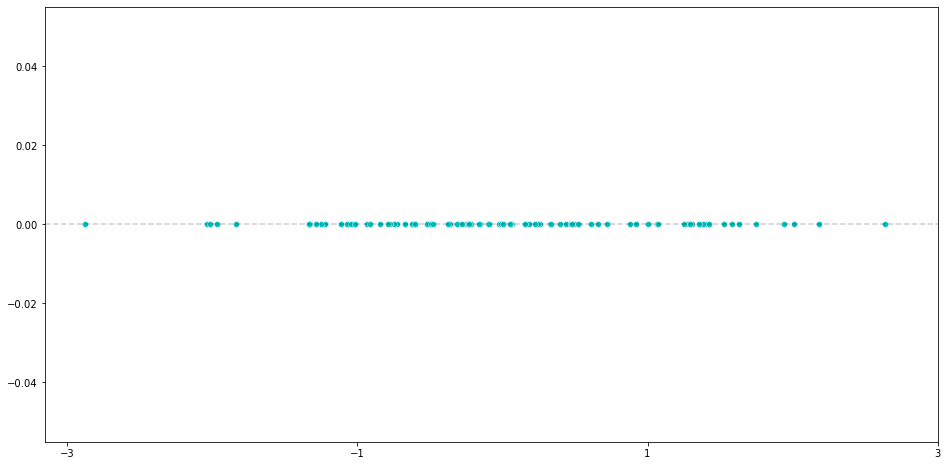

In [33]:
sample_from_normal_scatter(mu=0, sigma=1, sample_size=100)

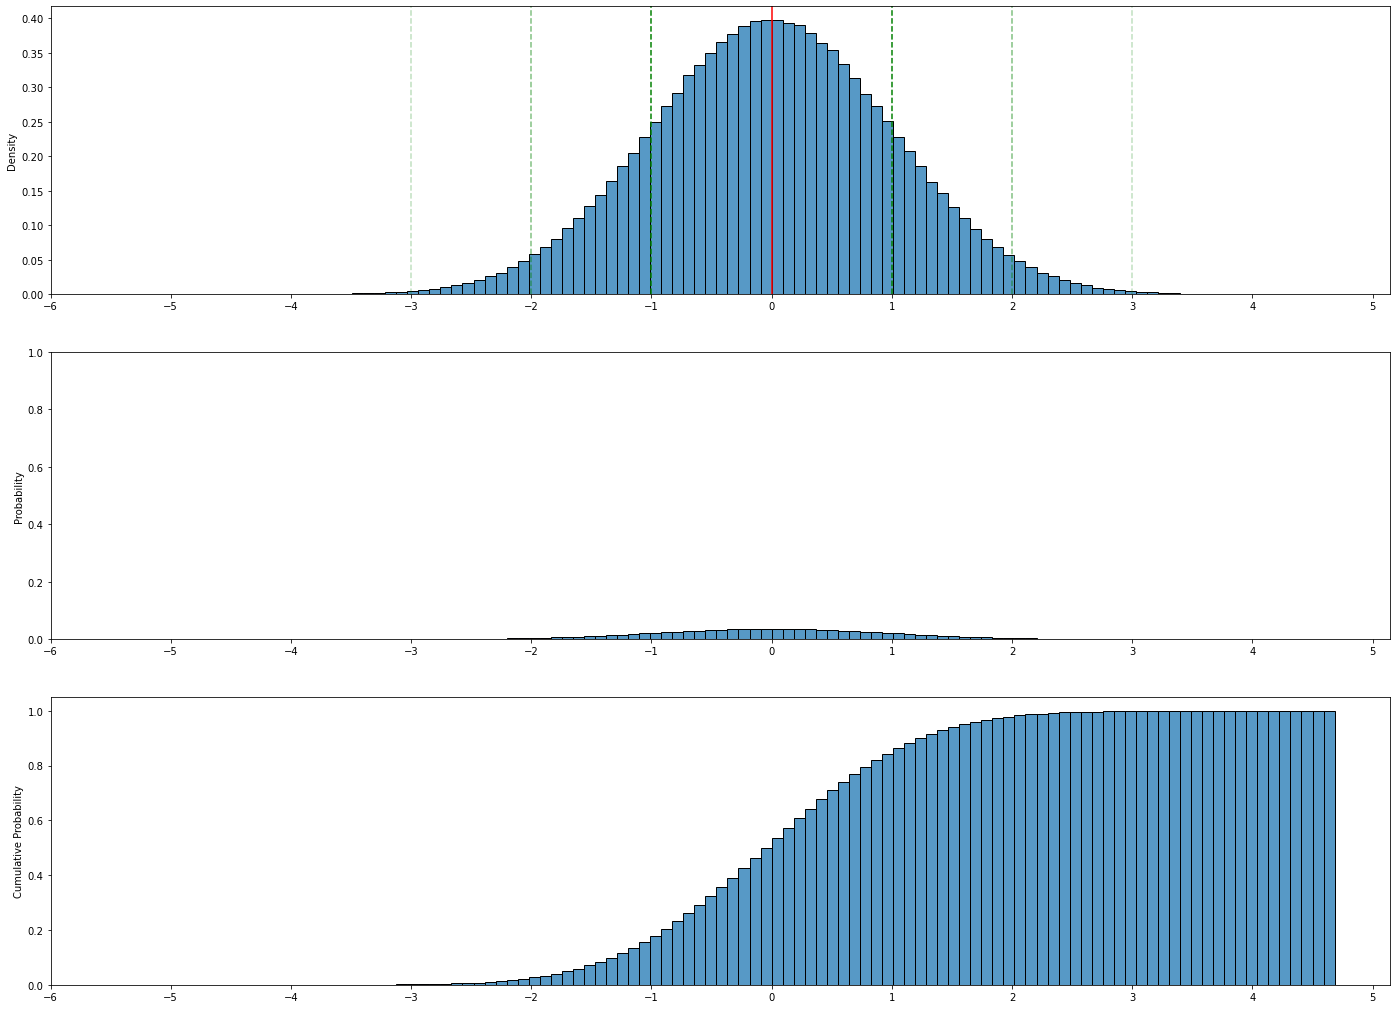

In [34]:
sample_from_normal_hist(mu=0, sigma=1, sample_size=10**6)

*Average time for delivery service to deliver food is 30 minutes, with standard deviance of 10 minutes. Asuming the time for delivery is random variable with Normal Distribution, find probability of your order arriving more than five minutes late than average.*

We have $X\sim\mathcal{N}(30, 100)$ and calculate

$$P(X > 35) = 1 - P(X\leqslant 35).$$

But wait, we don't have c.d.f. for this Normal Distribution, because it's not standard. Worry not, we can *standardize* a RV $X\sim\mathcal{N}(\mu, \sigma)$ by applying the following transformation

$$Z = \frac{X - \mu}{\sigma}.$$

RV $Z$ has the Standard Normal Distribution, and we can finde the value of its c.d.f. form the table. So, we continue our calculation:

$$P(X > 35) = 1 - P(X\leqslant 35) = 1 - P\Big(\frac{X - 30}{10}\leqslant  \frac{35 - 30}{10}\Big) = 1 - P(Z\leqslant 0.5) = 1 - \Phi(0.5) = 1 - 0.6915 = 0.3085.$$

Do we really need even to look at the table. No, if you have SciPy:)

#### Sci-py stuff

For Normal Distribution we use `norm` object from `scipy.stats` module, along with corresponding methods.

In [35]:
from scipy.stats import norm

To compute the probability above, we just do the following:

In [36]:
1 - norm.cdf(x=.5)

0.3085375387259869

We don't even need to standardize the RV, we can just pass `loc` and `scale` arguments in `.cdf()` method for $\mu$ and $\sigma$, respectively:

In [37]:
1 - norm.cdf(x=35, loc=30, scale=10)

0.3085375387259869

Getting back to our height example: *what's the height below which we are to expect to find 5% population from the sample?* This requires qantile function. If you remember, we have for our RV $\mathcal{N}(176, 36)$, so we compute: 

In [38]:
norm.ppf(q=.05, loc=176, scale=6)

166.13087823829116

## 3. Mathematical Expectation and Mathematical Variance

In a previous example for food delivery, we said that the average time for the delivery to happen is 30 minutes. Intuitivelly, you are going to *expect* your delivery in some thirty minutes. Is this *(mathematical) expectation* (or *expected value*) some kind of 'average' of a random variable? Is the average value of a sample drawn from a distribution equal to the expected value of the distribution? Generally it isn't. But it could be almost equal. If the sample is big enough. 

The difference between average of a sample and an expected value of a distribution is the difference between *sample mean* and *theoretical mean*. We're going to further illuminate this difference later on; but first, let's define mathematical expectation of a random variable more formally.

### Expectation for Discrete-type Random Variable

Let $X$ be a discrete-type RV

$$ X :
\begin{pmatrix}
a_1 & a_2 & \cdots & a_n\\
p_1 & p_2 & \cdots & p_n 
\end{pmatrix}.
$$

Its expected value $EX$ is calculated as:

$$EX = a_1p_1 + a_2p_2 + \cdots + a_np_n.$$

If RV $X$ takes infinite values, then this sum is infinite. 

For rolling a six-sided die we have a distribution

$$ X :
\begin{pmatrix}
1 & 2 & 3 & 4 & 5 & 6\\
\frac{1}{6} & \frac{1}{6} & \frac{1}{6} & \frac{1}{6} & \frac{1}{6} & \frac{1}{6}
\end{pmatrix},
$$

and its expected value is

$$EX = \frac{1+2+3+4+5+6}{6} = \frac{21}{6} = 3.5 .$$

Let's roll some dices again. We roll a die 10 times and compute its mean value. This is how we get sample mean $\bar{X}$. 

In [39]:
die = list(range(1, 7))

rolling = rng.choice(die, size=10)
rolling

array([2, 2, 5, 3, 6, 1, 4, 2, 6, 1])

In [40]:
rolling.mean()

3.2

Trying with more rolls...

In [41]:
rng.choice(die, size=100).mean()

3.39

In [42]:
rng.choice(die, size=10**6).mean()

3.500451

There it is: $\bar{X}$ *almost* equal to $EX$. And you've guessed it - we would have $\bar{X} = EX$ *exactly* if we rolled infinite amount of times. Thus we write

$$EX = \lim_{N\rightarrow\infty}\bar{X}_N =\lim_{N\rightarrow\infty}(X_1 + X_2 + \cdots + X_N).$$

So, sample mean approximates distribution mean when the sample is big enough. Or, in other words - expectation is *theoretical* mean, while the sample mean is *experimental* mean.

***

Many distributions have ready formula for their expected values, and some of them even use it as a parameter (say, $\lambda$ for Poission Distribution). Let's refresh on Binomial Distribution. For RV $X\sim\mathcal{B}(n, p)$ we have 

$$EX = np.$$

For tossing a coin 10 times, we have $X\sim\mathcal{B}(10, 0.5)$ and we expect to land Tails $EX = 10\cdot 0.5 = 5$ times. If we perofrm this experiment many times and plot the distribution of outcomes - we see the peak at 5. And we can also compute mean value of outcomes of all experiments: 

In [43]:
rng.choice([0, 1], size=10**6).mean()

0.500489

### Expectation for Continuous-type Random Variable

For a coninuous RV $X$ with p.d.f $\varphi(x)$ we compute its expected value with

$$EX = \int_{-\infty}^{+\infty}x\varphi(x)dx.$$

But don't worry - you don't need to compute this integral unless you reealy need; and you won't be doing that on this course, as the expectations of the distributions we're using are given in a formula.

For example, for Exponential Distribution $\mathcal{E}(\beta)$ we have 

$$EX = \beta.$$

So, if we receive, on average, 35 messages in one hour ($X\sim\mathcal{E}\big(\frac{1}{35}\big)$), the expected time to receive one message is, of course, $EX = 1/35 \approx 0.029$, some 1.74 minutes. Beautiful. But let's check this.

In [44]:
rng.exponential(scale=1/35, size=10**4).mean()

0.028042418988651775

Normal Distribution is another distribution which uses mean $\mu$ as a parameter.

### Variance

Variance is the *expected squared* deviation of a random variable from its mean. So, it's another expected value, and as such there exist *mathematical variance*, which is *theoretical* and sample variance, which is *experimental*.

Mathematical variance is computed using the formula:

$${\rm Var}(X) = E[(X - EX)^2].$$


Sample variance is computed using the formula:

$$s^2 = \frac{\sum\limits_{i=1}^{N}{(X_i - \bar{X})^2}}{N - 1},$$

where $N$ is the sample size and $\bar{X}$ is the sample mean.

For a sample big enough, sample variance approximates theoretical variance.

***

As for the expectation, there's no need to compute theoretical variance for frequently used distributions, as there is a formula. 

For Binomial Distribution $\mathcal{B}(n, p)$ we have

$${\rm Var}(X) = np(1-p).$$

Let's use this formula in our example for $\mathcal{B}(10, 0.5)$ (tossing a coin 10 times) to see how sample variance approximate theoretical variance. So, the theoretical value is

$${\rm Var}(X) = 10\cdot 0.5\cdot 0.5 = 2.5.$$

This means that we expect, when drawing a sample, to land Tails 5 $\pm$ 2.5 times in 10 tosses, most of the time. 

In [45]:
rng.choice([0, 1], size=10**3).var(ddof=1)

0.2500540540540541

Normal distribution uses the variance as the second parameter $\sigma$. For our population in the previous example with $\mathcal{N}(176, 36)$ we sample and compute the variance:

In [46]:
rng.normal(loc=176, scale=6, size=10**6).var(ddof=1)

36.06000952749299

#### SciPy-Stuff

We can find theoretical expectation and variance of a given distribution using `.stats()` method from the corresponding distribution in `scipy.stats` module.

For $\mathcal{B}(10, 0.5)$ we compute

In [47]:
from scipy.stats import binom

In [48]:
binom.stats(n=10, p=.5)

(array(5.), array(2.5))

For $\mathcal{N}(176, 36)$ we get

In [49]:
norm.stats(loc=176, scale=6)

(array(176.), array(36.))

(Who would say?...)

## 4. $\chi^2$ Distribution and the Related Test

Observe $k$ random variables $Z_1, Z_2, \ldots, Z_k$ which are independent from one another and follow the same Standard Normal Distribution ($\mathcal{N}(0,1)$). Such RVs - which are independent and have the same distribution are called *independent and identically distributed* or *IID*. So, let our IID random variables $Z_1, Z_2, \ldots, Z_k$ all have $\mathcal{N}(0,1)$ distribution. If we square those RVs and sum up those squares we obtain a new random variable $X$:

$$X = X_1^2 + X_2^2 + \cdot + X_k^2.$$


This new RV $X$ has *Chi-Squared Distribution* with $k$ *degrees of freedom*, which is denoted by $\chi^2_k$. So, $\chi^2_k$ is a continuous-type distribution with a single parameter $k$. 



Let's now plot p.d.f and c.d.f of $\chi^2_k$ by sampling. We sample by using `rng.chisquare()` and `df` argument for the degrees of freedom. 

We'll sample from $\chi^2_3$

In [50]:
def sample_from_chisquare(df, sample_size=10**3):
    
    fig, ax = plt.subplots(3, 1, figsize=(24, 18))
    
    sample = rng.chisquare(df=df, size=sample_size)
    
    sns.histplot(ax=ax[0], x=sample, bins=100, stat='density')
    sns.histplot(ax=ax[1], x=sample, bins=100, stat='probability')
    sns.histplot(ax=ax[2], x=sample, bins=100, stat='probability', cumulative=True)
    
    ax[0].set_xticks(np.arange(0, sample.max(), 1))
    ax[1].set_xticks(np.arange(0, sample.max(), 1))
    ax[2].set_xticks(np.arange(0, sample.max(), 1))
    
    ax[1].set_yticks(np.arange(0, 1.2, .2))
    
    ax[2].set_ylabel('Cumulative Probability')

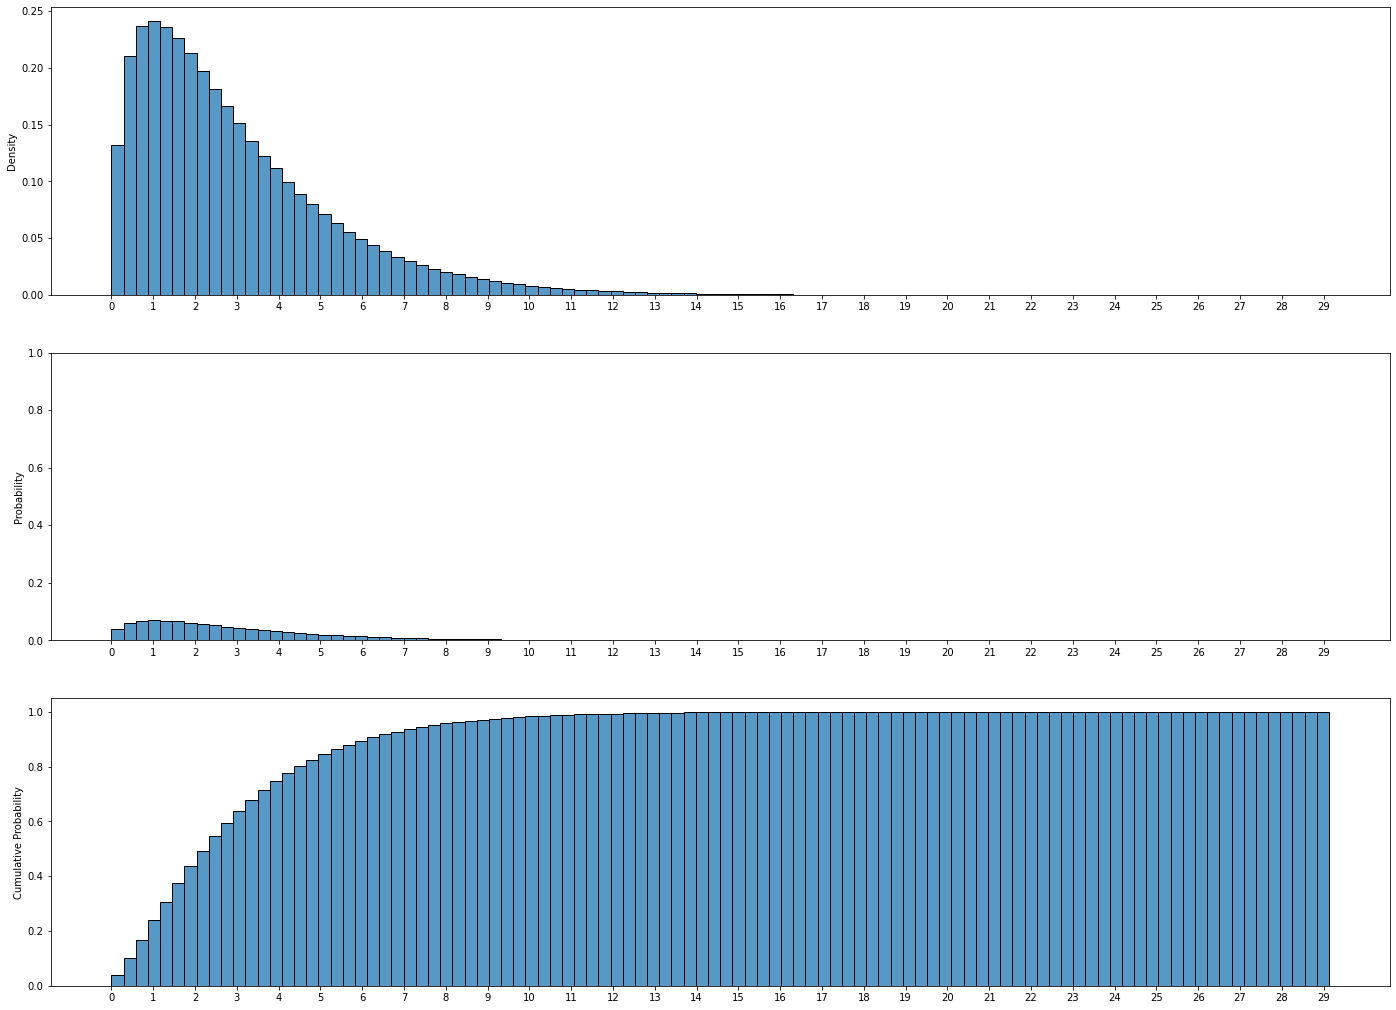

In [51]:
sample_from_chisquare(df=3, sample_size=10**6)

Formally, the formula for p.d.f for $\chi^2_k$ is given by

$$\varphi(x;k) = 
\begin{cases}
2\frac{x^{(k/2 - 1)e^{-x/2}}}{2^{k/2}\Gamma\big(\frac{k}{2}\big)}\quad x > 0,\\
\\
0,\quad x \leqslant 0,
\end{cases}
$$

where $\Gamma$ is the *gamma function* for which $\Gamma(n) = (n-1)!$ for every positive integer $n$. 

This formula might induce a headache, and the formula for c.d.f of $\chi^2_k$ is even heavier, as it involves *lower incomplete gamma function*; yeah, I know. We won't even write it. But worry not - there are corresponding statistical tables to find values for these nerve-wracking formulas. 

***

Let's get back to the plots for p.d.f and c.d.f of $\chi^2_k$. We see there that a RV $X\sim\chi^2_k$ can take various positive values in the support of $\chi^2_k$, but what do those values mean? 

To see this, let's draw a sample from a population with an assumed distribution. Every member of the sample can take one $k$ values, i.e. *categories*. We count those values, for each category. Based on the observed values in the sample we can make a *hypothesis* whether the sample's distribution follows the assumed distribution of the population. Now we wonder how valid our hypothesis is? To see that, we need somehow to compare *observed counts* obtained from the sample, and *expected counts* which are expected from the distribution of the population. By comparing them, we want to see how they deviate from one another, i.e. to see how much sample deviates from the distribution of the population. As a measure of this deviation we introduce $\chi^2$ *statistic* computed by

$$\chi^2 = \sum_{i=1}^k\frac{({\rm Observed\ Counts}_i - {\rm Expected\ Counts}_i)^2}{{\rm Expected\ Counts}_i}.$$

Noticing that we are having sum of squares again? These deviations are stochastic, and their values/probabilities distribute according to $\chi^2$ distribution. We use computed $\chi^2$ value to perform *chi-square test* and see if the distribution of the sample and the distribution of the population are the same. This is the *zero-hypothesis* of the test. The alternative hypothesis, is of course, that they are different.

***

We illustrate how to perform chi-square test using the following example:

*An urn contains white, blue, and red balls in proportion of 5:3:2. We draw from the urn a sample of size $n=100$ and obtain a sample with 47 white, 31 blue and 22 red balls. Can we say that the sample follwos the same distribution as the balls in the urn?*

The distribution of the population in the urn is called *Multinomial Distribution*. It is a discrete-type distribution, and it is a generalization of the Binomial Distribution. Whereas in Binomial Distribution every repetition of experiment has a binary 'yes/no' outcome, in Multinomial Distribution every repetition has three or more outcomes, each with given probability. 

So, we want to check whether the drawn sample is distributed according to Multinomial Distribution. To do this, we utilize $\chi^2$ test. First, we need to calculate expected counts. Obviously, they are 50, 30 and 20 for white, blue and red balls, respectively. Observed counts given from the sample. Now we compute $\chi^2$ statistic:

$$\chi^2 = \frac{(47 -50)^2}{50} + \frac{(31 - 30)^2}{30} + \frac{(22 - 20)^2}{20} = 0.41333... .$$ 

Now we want to check whether the following holds:

$$P(X \geqslant \chi^2) \leqslant 0.05,$$

where $X\sim\chi^2_2$. Notice the degrees of freedom? In this (and similar) settings, the d.o.fs are always one less than the number of categories. 

- $p = P(X \geqslant \chi^2)$ measures the *p-value* of the sample, i.e. the probability of obtaining a result with at least the deviance of $\chi^2$, given that the null hypothesis is true.

- $\alpha=0.05$ is the *significance level*, and it is set for the test beforhand. Usually we take $\alpha = 0.05$ or $\alpha = 0.01$. 

We say that the result is *statistically significant* if 

$$p\leqslant\alpha,$$

meaning that it is quite unlikely that the deviance of the observed results from expected results happend by chance, so we can reject the null hypothesis. 

Otherwise, the result is not statistically signigicant to reject the null hypothesis - the deviations of the observed results are most likely just due to the stochastic nature of sampling. 

Now, we calculate:

$$p = P(X\geqslant 0.4133) = 1 - P(X < 0.4133) = 1 - F(0.4133).$$


To find the value of $F(0.4133)$ we can use `chi2` object from `scipy.stats` module:

In [52]:
from scipy.stats import chi2

In [53]:
1 - chi2.cdf(x=0.4133, df=2)

0.8133042566683305

Obviously, $p > \alpha$, so we do not reject the null hypothesis. 

*Draw a random sample of balls of size $n=100$ from some other Multinomial Distribution, and perform chi-square test against the expected value from the example above.* 

We use `rng.multinomial()` to sample from Multinomial Distribution, where we provide probabilities for each category using `pvals` argument.

In [54]:
#sampling 
observed = rng.multinomial(n=100, pvals=[.3, .3, .4])
observed

array([34, 23, 43], dtype=int64)

In [55]:
#computing chi^2 statistic
expected = np.array([50, 30, 20])

chi_sq_stat = np.sum(((observed - expected)**2)/observed)
chi_sq_stat

21.962172128709927

In [56]:
#computing p-value
p_val = 1 - chi2.cdf(x=chi_sq_stat, df=2)
p_val

1.702060201591582e-05

In [57]:
if p_val > .05:
    print('The result is not statistically significant. We do not reject the null hypothesis.')
else:
    print('The result is statistically significant. Rejecting the null hypothesis.')

The result is statistically significant. Rejecting the null hypothesis.
